In [16]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
import numpy as np

In [17]:
X, Y = make_classification(n_classes=2, n_samples=400, n_clusters_per_class=1, random_state=3, n_features=2, n_informative=2, n_redundant=0)

In [32]:
# convert y into 1 and -1
print(Y)

Y[Y==0] = -1
print(Y)

[0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0
 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0
 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1
 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0
 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1
 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1
 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0
 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1
 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1
 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0]
[-1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1

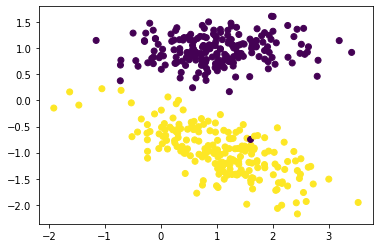

In [33]:
plt.scatter(X[:,0], X[:,1],c=Y)
plt.show()

In [48]:
class SVM:
    def __init__(self, C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self, W, b, X, Y):
        loss = 0.0
        
        loss += 0.5*np.dot(W, W.T)
        
        m = X.shape[0]
        for i in range(m):
            ti = Y[i]*(np.dot(W, X[i].T) + b)
            loss += self.C * max(0, 1-ti)
            
        return loss[0][0]
    
    def fit(self, X, Y, batch_size=100, learning_rate=0.001, maxItr=300):
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        # init model parameters
        W = np.zeros((1,no_of_features))
        b = 0
        
        print(self.hingeLoss(W,b,X,Y))
        
        # training from here
        # update weight and bias rule
        losses = []
        
        for i in range(maxItr):
            #training loop
            l = self.hingeLoss(W,b,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            # batch gradient with random suffling
            for batch_start in range(0,no_of_samples, batch_size):
                #assume 0 gradient for the batch
                gradW = 0
                gradb = 0
                
                # iterate over all examples in the mini batch
                for j in range(batch_start, batch_start+batch_size):
                    if j < no_of_samples:
                        i = ids[j]
                        
                        ti = Y[i]*(np.dot(W, X[i].T) + b)
                        if ti > 1:
                            gradW += 0
                            gradb += 0
                        else:
                            gradW += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                # gradient for the batch us ready, now update w and b
                W = W - n*W + n*gradW
                b = b + n*gradb
                
        self.W = W
        self.b = b
        return W, b, losses

In [106]:
mySVM = SVM(C=1)

In [107]:
W,b,losses = mySVM.fit(X,Y, maxItr=100)

print(losses[0], losses[-1])

400.0
400.0 14.952673047924522


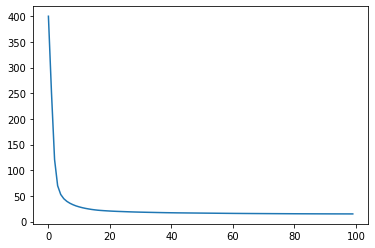

In [108]:
plt.plot(losses)

In [109]:
def plotHyperplane(w1,w2,b):
    
    x1 = np.linspace(-2,4,10)
    x2 = -(w1*x1+b)/w2
    
    xp = -(w1*x1+b+1)/w2
    xn = -(w1*x1+b-1)/w2
    
    plt.figure(figsize=(12,12))
    plt.plot(x1,x2)
    plt.plot(x1,xp)
    plt.plot(x1,xn)
    
    plt.scatter(X[:,0], X[:,1],c=Y)
    plt.show()

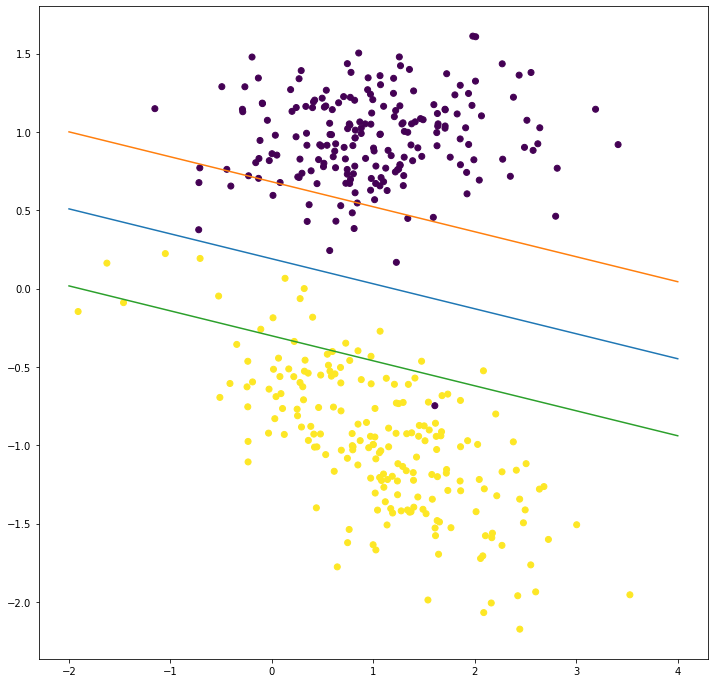

In [110]:
plotHyperplane(W[0,0],W[0,1],b)

In [78]:
### visualising support vectors, positive and negative hyperplanes